## **Logistic regression**
Logistic regression is a linear binary classifier based on the application of a sigmoid function to a linear combination of features, the result of which is the probability of belonging to a certain class. Usually, the threshold is set to 0.5: if the probability is less than the threshold, the class belongs to 0, and if it is greater, to 1. In principle, the conditions for determining logistic regression are the same as for linear regression, except for the target binarization.

Since the prediction in linear regression can take values in any range, and we need the probabilities of belonging to a class in the range [0; 1], the prediction of linear regression can be represented as a logarithm of chances (chance is the ratio of the probability of an event to its non-fulfillment) and already from it express the probability of belonging to a class. The resulting function is called sigmoid.

$\ln(\frac{p_+}{1 - p_+}) = w \cdot x + b$

$\frac{p_+}{1 - p_+} = e^{w \cdot x + b} \ \ \Rightarrow \ \ p_+ = \frac{1}{1 + e^{-(w \cdot x + b)}} = \sigma(w \cdot x + b)$

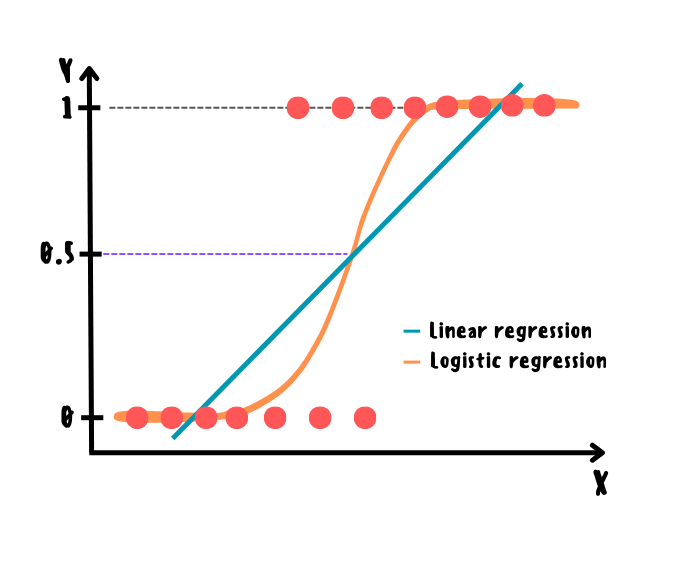

### **Cost function and maximum likelihood method**
The best way to choose a line (plane) for class separation is to minimize the average logistic cost function based on the optimization of the maximum likelihood method. The essence of this method is to find model parameters that will match observations with maximum probability, and its optimization consists in the logarithm of likelihood instead of likelihood due to computational efficiency and more stable results. Simply put, the cost function is simply the average loss over the entire training set.

Since there is no analytical solution in this case, and the loss function is smooth and convex, the training of logistic regression also takes place on the basis of gradient descent, as in the case of linear regression.

### **Derivation of the logistic regression equation and the gradient of its cost function**

$\begin{equation}
  L(\sigma(z), y_i) = \begin{cases}
    - \ln\sigma(z) & \text{if $y_i=1$}\\
    - \ln(1 - \sigma(z)) & \text{if $y_i=0$}
  \end{cases}
\end{equation} \ - \ $ initial form of the logistic loss

$L(\sigma(z), y_i) = \prod\limits_{i=1}^{n} σ(z)^{y_i} (1 - \sigma(z))^{(1-y_i)}
\ \ - \ $ maximum likelihood method

$L_{log}(\sigma(z), y_i) = -[y_i\ln\sigma(z) + (1 - y_i)\ln(1 - \sigma(z))]\ \ - \ $ logistic loss with likelihood logarithm

$J(w, b) = \frac{1}{n} \sum\limits_{i = 1}^{n}
L_{log}(\sigma(z), y_i)\ \ - \ $ cost function for all training samples


**Gradients of cost function for bias and weights respectively**

$\frac{\partial J(w, b)}{\partial b} =
(\frac{1}{n} \sum\limits_{i = 1}^{n} L_{log}(\sigma(z), y_i))' =
 \frac{1}{n} \sum\limits_{i = 1}^{n} \frac{\partial{L_{log}(\sigma(z), y_i)}}{\partial{b}} = \frac{1}{n} \sum\limits_{i = 1}^{n} (\sigma(z) - y_i)$

$\frac{\partial J(w, b)}{\partial \omega} =
(\frac{1}{n} \sum\limits_{i = 1}^{n} L_{log}(\sigma(z), y_i))' =
 \frac{1}{n} \sum\limits_{i = 1}^{n} \frac{\partial{L_{log}(\sigma(z), y_i)}}{\partial{\omega}} = \frac{1}{n} \sum\limits_{i = 1}^{n} (\sigma(z) - y_i)x_i$

**Partial derivatives of logistic loss for bias and weights respectively**

$\frac{\partial{L_{log}(\sigma(z), y_i)}}{\partial{b}} =
 \frac{\partial{L_{log}(\sigma(z), y_i)}}{\partial{\sigma(z)}} \cdot
 \frac{\partial{\sigma(z)}}{\partial{z}} \cdot \frac{\partial{z}}{\partial{b}}$

$\frac{\partial{L_{log}(\sigma(z), y_i)}}{\partial{\omega}} =
 \frac{\partial{L_{log}(\sigma(z), y_i)}}{\partial{\sigma(z)}} \cdot
 \frac{\partial{\sigma(z)}}{\partial{z}} \cdot \frac{\partial{z}}{\partial{\omega}}$

$\frac{\partial{L_{log}(\sigma(z), y_i)}}{\partial{\sigma(z)}} =
-[y_i(\ln\sigma(z))' + (1 - y_i)(\ln(1 - \sigma(z)))'] =
-[y_i \cdot \frac{1}{\sigma(z)} + (1 - y_i) \cdot
\frac{1}{1-\sigma(z)} \cdot (-1)] = \\
= \frac{1 - y_i}{1 - \sigma(z)} - \frac{y_i}{\sigma(z)} =
\frac{\sigma(z) - \sigma(z) y_i - y_i + \sigma(z) y_i}{\sigma(z)
(1 - \sigma(z)} = \frac{\sigma(z) - y_i}{\sigma(z)(1 - \sigma(z))}$

$\frac{\partial{\sigma(z)}}{\partial{z}} = ((1 + e^{-z})^{-1})' =
\frac{-1}{(1 + e^{-z})^{-2}} \cdot e^{-z} \cdot (-1) =
\frac{e^{-z}}{(1 + e^{-z})^{-2}} = |e^{-z} = \frac{1}{\sigma(z)} - 1 =
\frac{1-\sigma(z)}{\sigma(z)}| =
\frac{1 - \sigma(z)}{\sigma(z)(1 + \frac{1 - \sigma(z)}{\sigma(z)})^{2}}
= \sigma(z)(1 - \sigma(z))$


$\frac{\partial z}{\partial b} = (w \cdot x_i)' + b' = 0 + 1 = 1$

$\frac{\partial z}{\partial \omega} = w' \cdot x_i + w \cdot x_i' + b' = x_i + 0 + 0 = x_i$

$\frac{\partial{L_{log}(\sigma(z), y_i)}}{\partial{b}} =
 \frac{\sigma(z) - y_i}{\sigma(z)(1 - \sigma(z))} \cdot
 \sigma(z)(1 - \sigma(z)) = \sigma(z) - y_i$

$\frac{\partial{L_{log}(\sigma(z), y_i)}}{\partial{\omega}} =
 \frac{\sigma(z) - y_i}{\sigma(z)(1 - \sigma(z))} \cdot
 \sigma(z)(1 - \sigma(z)) \cdot x_i = (\sigma(z) - y_i)x_i$

**Where**:

$\sigma(z) = \frac{1}{1 + e^{-z}}\ \ - \ $ sigmoid function;

$z_{w, b}(x_i) = w \cdot x_i + b\ \ - \ $ linear function;

$b \ \ - \ $ bias

$w \ \ - \ $ weights vector

$x_i \ \ - \ $ features vector of i-th sample

### **The principle of logistic regression operation**

As you might guess, the training of logistic regression is identical to linear regression, except for passing linear predictions through the sigmoid function at each iteration. Using the obtained weights, a linear prediction is first performed, and then the final one via a sigmoid function: the obtained probabilities are rounded according to a given threshold (usually 0.5).

It is also worth noting that logistic regression is characterized by the same features in terms of optimization and regularization as linear regression.

## **Softmax-regression**
Logistic regression can also be generalized to multiclass classification. There are 2 strategies for this:
- **one vs rest**, when a model is trained for each unique class in the target based on binarization and the class with the maximum probability is selected as the final prediction;
- **softmax**, when one model supports many classes directly, which we're gonna consider in more detail right now.

The idea of softmax-regression is as follows: first, the target is binarized using one-hot and a table of weights is built for the features in an amount proportional to the number of unique values in the target. Next, a linear prediction is calculated taking into account the weights for each class, after which the results are estimated as a probability of a class from 0 to 1 using the softmax function, which is also called normalized exponential.

In this case, cross-entropy will act as a cost function, since it penalizes the model in case of a low probability estimate for the target class. In other words, cross-entropy is used to assess the quality of matching a set of estimated probabilities of classes to target classes. The final prediction for the test sample will be the class with the highest probability.

**Formulas for calculations**

$z_k (x^{(i)}) = w_k \cdot x^{(i)} + b_k\ - \ $ linear prediction for class k

$p_k = \frac{e^{z_k (x^{(i)})}}{\sum \limits_{j=1}^{K} e^{z_j (x^{(i)})}} \ - \ $ softmax function

$J(\Theta) = - \frac{1}{n} \sum \limits_{i=1}^{n} \sum \limits_{k=1}^{K} y_k^{(i)}
log(\hat p_k^{(i)}) \ - \ $ cost funtcion

$\frac{\partial J(\Theta)}{\partial b_k} = \frac{1}{n} \sum \limits_{i=1}^{n} (\hat p_k^{(i)} - y_k^{(i)}) \ - \ $ bias gradient for class k

$\frac{\partial J(\Theta)}{\partial w_k} = \frac{1}{n} \sum \limits_{i=1}^{n} (\hat p_k^{(i)} - y_k^{(i)}) x^{(i)} \ - \ $ weights vector-gradient for class k

K - number of classes

$\Theta \ - \ $ parameters matrix

As you can see, in fact, softmax is a faster optimization of one vs rest, which allows you to avoid training unnecessary models, which will be especially useful when working with large datasets. Another interesting observation is that if there are only two classes in the target (k=2), the cost function will be equivalent to log loss in logistic regression for the binary case.

### **Python implementation from scratch**

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [23]:
class GDLogisticRegression:
    def __init__(self, learning_rate=0.1, tolerance=0.0001, max_iter=1000):
        self.learning_rate = learning_rate
        self.tolerance = tolerance
        self.max_iter = max_iter

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.bias, self.weights = 0, np.zeros(n_features)
        previous_db, previous_dw = 0, np.zeros(n_features)

        for _ in range(self.max_iter):
            y_pred_linear = X @ self.weights + self.bias
            y_pred_sigmoid = 1 / (1 + np.exp(-y_pred_linear))
            db = 1 / n_samples * np.sum(y_pred_sigmoid - y)
            dw = 1 / n_samples * X.T @ (y_pred_sigmoid - y)

            self.bias -= self.learning_rate * db
            self.weights -= self.learning_rate * dw
            abs_db_reduction = np.abs(db - previous_db)
            abs_dw_reduction = np.abs(dw - previous_dw)

            if abs_db_reduction < self.tolerance:
                if abs_dw_reduction.all() < self.tolerance:
                    break

            previous_db = db
            previous_dw = dw

    def predict(self, X_test):
        y_pred_linear = X_test @ self.weights + self.bias
        y_pred_sigmoid = 1 / (1 + np.exp(-y_pred_linear))
        classes = np.array([0 if pred < 0.5 else 1 for pred in y_pred_sigmoid])

        return classes

In [24]:
class SoftmaxRegression:
    def __init__(self, learning_rate=0.1, tolerance=0.0001, max_iter=1000):
        self.learning_rate = learning_rate
        self.tolerance = tolerance
        self.max_iter = max_iter

    def _softmax(self, predictions):
        exp = np.exp(predictions)

        return exp / np.sum(exp, axis=1, keepdims=True)

    def fit(self, X, y):
        n_classes = len(np.unique(y))
        n_samples, n_features = X.shape
        one_hot_y = pd.get_dummies(y).to_numpy()

        self.bias = np.zeros(n_classes)
        self.weights = np.zeros((n_features, n_classes))
        previous_db = np.zeros(n_classes)
        previous_dw = np.zeros((n_features, n_classes))

        for _ in range(self.max_iter):
            y_pred_linear = X @ self.weights + self.bias
            y_pred_softmax = self._softmax(y_pred_linear)
            db = 1 / n_samples * np.sum(y_pred_softmax - one_hot_y, axis=0)   # sum by columns
            dw = 1 / n_samples * X.T @ (y_pred_softmax - one_hot_y)

            self.bias -= self.learning_rate * db
            self.weights -= self.learning_rate * dw
            abs_db_reduction = np.abs(db - previous_db)
            abs_dw_reduction = np.abs(dw - previous_dw)

            if abs_db_reduction.all() < self.tolerance:
                if abs_dw_reduction.all() < self.tolerance:
                    break

            previous_db = db
            previous_dw = dw

    def predict(self, X_test):
        y_pred_linear = X_test @ self.weights + self.bias
        y_pred_softmax = self._softmax(y_pred_linear)
        most_prob_classes = np.argmax(y_pred_softmax, axis=1)

        return most_prob_classes

In [25]:
def decision_boundary_plot(X, y, X_train, y_train, clf, feature_indexes, title=None):
    feature1_name, feature2_name = X.columns[feature_indexes]
    X_feature_columns = X.values[:, feature_indexes]
    X_train_feature_columns = X_train.values[:, feature_indexes]
    clf.fit(X_train_feature_columns, y_train.values)

    plot_decision_regions(X=X_feature_columns, y=y.values, clf=clf)
    plt.xlabel(feature1_name)
    plt.ylabel(feature2_name)
    plt.title(title)

### **Uploading datasets**
[Heart Attack dataset](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset) will be used to train logistic regression where it is necessary to predict the occurrence or absence of a heart attack in patients based on their indicators in the analyses.

In the case of softmax-regression, the [Credit Score Classification Dataset](https://www.kaggle.com/datasets/sujithmandala/credit-score-classification-dataset/data) is used  to predict people's credit rating based on their age, income, and so on.

In [26]:
df_path = "/content/drive/MyDrive/heart_attack.csv"
heart_attack = pd.read_csv(df_path)
print(heart_attack.head())

X1, y1 = heart_attack.iloc[:, :-1], heart_attack.iloc[:, -1]
X1_scaled = StandardScaler().fit_transform(X1)
y1 = pd.Series(LabelEncoder().fit_transform(y1))

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=0)
X1_train_s, X1_test_s, y1_train, y1_test = train_test_split(X1_scaled, y1, random_state=0)

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [27]:
df_path = "/content/drive/MyDrive/credit_score.csv"
credit_score = pd.read_csv(df_path)
print(credit_score.head())

X2, y2 = credit_score.iloc[:, :-1], credit_score.iloc[:, -1]
cat_features_list = X2.select_dtypes(include=['object']).columns
X2[cat_features_list] = X2[cat_features_list].apply(LabelEncoder().fit_transform)
X2_scaled = StandardScaler().fit_transform(X2)
y2 = pd.Series(LabelEncoder().fit_transform(y2))

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=0)
X2_train_s, X2_test_s, y2_train, y2_test = train_test_split(X2_scaled, y2, random_state=0)

   Age  Gender  Income            Education Marital Status  \
0   25  Female   50000    Bachelor's Degree         Single   
1   30    Male  100000      Master's Degree        Married   
2   35  Female   75000            Doctorate        Married   
3   40    Male  125000  High School Diploma         Single   
4   45  Female  100000    Bachelor's Degree        Married   

   Number of Children Home Ownership Credit Score  
0                   0         Rented         High  
1                   2          Owned         High  
2                   1          Owned         High  
3                   0          Owned         High  
4                   3          Owned         High  


### **Models training and evaluation of the obtained results**
The logistic regression has showed a pretty good result, but not the best. First of all, this is due to some noise in the data and since it is still a linear classifier, it can be concluded that it works better with data where there is an obvious linear separation, which is clearly noticeable in the data for the case of softmax-regression.

**Logistic regression**

In [28]:
logistic_regression = GDLogisticRegression()
logistic_regression.fit(X1_train_s, y1_train)
pred_res = logistic_regression.predict(X1_test_s)
accuracy = accuracy_score(y1_test, pred_res)

print(f'Logistic regression accuracy: {accuracy}')
print(f'prediction: {pred_res}')

Logistic regression accuracy: 0.8289473684210527
prediction: [0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0
 0 1]


**Logistic regression (scikit-learn)**

sk Logistic regression accuracy: 0.8289473684210527
prediction: [0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0
 0 1]


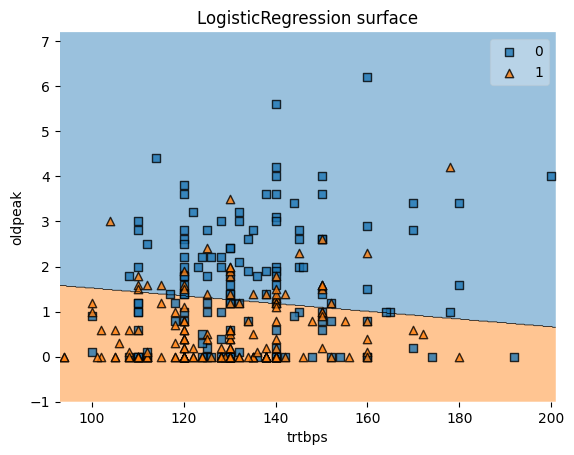

In [29]:
sk_logistic_regression = LogisticRegression(penalty=None, max_iter=1000, multi_class='ovr')
sk_logistic_regression.fit(X1_train, y1_train)
sk_pred_res = sk_logistic_regression.predict(X1_test)
sk_accuracy = accuracy_score(y1_test, sk_pred_res)

print(f'sk Logistic regression accuracy: {sk_accuracy}')
print(f'prediction: {sk_pred_res}')

feature_indexes = [3, 9]
title1 = 'LogisticRegression surface'
decision_boundary_plot(X1, y1, X1_train, y1_train, sk_logistic_regression, feature_indexes, title1)

**Softmax regression**

In [30]:
softmax_regression = SoftmaxRegression()
softmax_regression.fit(X2_train_s, y2_train)
softmax_pred_res = softmax_regression.predict(X2_test_s)
softmax_accuracy = accuracy_score(y2_test, softmax_pred_res)

print(f'Softmax-regression accuracy: {softmax_accuracy}')
print(f'Softmax prediction: {softmax_pred_res}')

Softmax-regression accuracy: 0.975609756097561
Softmax prediction: [1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 2 1 1 0 1 1 1 0 1 2 1 1 0
 1 0 1 1]


**Softmax regression (scikit-learn)**

In [31]:
sk_softmax_regression = LogisticRegression(penalty=None, max_iter=1000, multi_class='multinomial')
sk_softmax_regression.fit(X2_train, y2_train)
sk_softmax_pred_res = sk_softmax_regression.predict(X2_test)
sk_softmax_accuracy = accuracy_score(y2_test, sk_softmax_pred_res)

print(f'sk Softmax-regression accuracy: {sk_softmax_accuracy}')
print(f'sk Softmax prediction: {sk_softmax_pred_res}')

sk Softmax-regression accuracy: 0.975609756097561
sk Softmax prediction: [1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 2 1 1 0 1 1 1 0 1 2 1 1 0
 1 0 1 1]


### **Pros and cons of logistic & softmax-regressions**
Pros:
- easy to implement and interpret;
- high speed operation;
- relatively good accuracy in the case of linear dependence in the data.

Cons:
- low flexibility and adaptability due to the assumption of linearity of the data;
- low accuracy in the case of complex data, which follows from the previous point;
- sensitivity to noise and emissions.

It is worth noting that, as in the case of linear regression, the listed disadvantages relate to implementation in its pure form and can be partially or completely eliminated using regularization methods or adding polynomial features. However, today there are other algorithms that significantly outperform logistic regression in terms of accuracy and stability.

### **Additional sources**
Documentation:
- [logistic regression description](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression);
- [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

[Lecture](https://www.youtube.com/watch?v=19a_MTJX14g).

[Playlist](https://www.youtube.com/playlist?list=PLblh5JKOoLUKxzEP5HA2d-Li7IJkHfXSe).

[One vs rest](https://www.youtube.com/watch?v=V8fS0T_ktn4).

Softmax-regression: [one](https://www.youtube.com/watch?v=M59JElEPgIg), [two](https://www.youtube.com/watch?v=LLux1SW--oM).